# Python数据处理实战案例（3）：COVID-19数据分析

## 题目：从网上获取各国的COVID-19疫情跟踪数据，并进行分析

### 提示：
#### （1）腾讯新闻从WHO和霍普金斯大学网站获取并整理了COVID-19的疫情跟踪数据，API接口URL为：
* url4 = "https://api.inews.qq.com/newsqa/v1/automation/foreign/daily/list?country=美国" （海外历史数据）
#### （2）foreign_countries.csv 文件中给出了国家列表

* 国家列表：foreign_countries.csv

In [13]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20, 10))
plt.rc('lines', lw=2, color='red')

import requests
from bs4 import BeautifulSoup
import json

In [31]:
url = "https://api.inews.qq.com/newsqa/v1/automation/foreign/daily/list?country=美国"
usa_data= []
resp = requests.get(url)
resp

<Response [200]>

In [32]:
usa_data=resp.json()['data']
usa_data

[{'y': '2020',
  'date': '01.28',
  'confirm_add': 0,
  'confirm': 5,
  'heal': 0,
  'dead': 0},
 {'y': '2020',
  'date': '01.29',
  'confirm_add': 0,
  'confirm': 5,
  'heal': 0,
  'dead': 0},
 {'y': '2020',
  'date': '01.30',
  'confirm_add': 1,
  'confirm': 6,
  'heal': 0,
  'dead': 0},
 {'y': '2020',
  'date': '01.31',
  'confirm_add': 0,
  'confirm': 6,
  'heal': 0,
  'dead': 0},
 {'y': '2020',
  'date': '02.01',
  'confirm_add': 1,
  'confirm': 7,
  'heal': 0,
  'dead': 0},
 {'y': '2020',
  'date': '02.02',
  'confirm_add': 1,
  'confirm': 8,
  'heal': 0,
  'dead': 0},
 {'y': '2020',
  'date': '02.03',
  'confirm_add': 3,
  'confirm': 11,
  'heal': 1,
  'dead': 0},
 {'y': '2020',
  'date': '02.04',
  'confirm_add': 0,
  'confirm': 11,
  'heal': 1,
  'dead': 0},
 {'y': '2020',
  'date': '02.05',
  'confirm_add': 0,
  'confirm': 11,
  'heal': 1,
  'dead': 0},
 {'y': '2020',
  'date': '02.06',
  'confirm_add': 1,
  'confirm': 12,
  'heal': 1,
  'dead': 0},
 {'y': '2020',
  'date': '

In [43]:
import datetime
usa_table=pd.DataFrame(usa_data, columns = ['y','date','confirm_add','confirm','heal','dead'])
usa_table.columns=['年份','月日','新增病例','确诊人数','治愈人数','死亡人数']
usa_table['年月日']=usa_table['年份']+'.'+usa_table['月日']
usa_table=usa_table.drop(columns=['月日'])

usa_table

TypeError: data type 'datetime' not understood

<AxesSubplot:xlabel='date'>

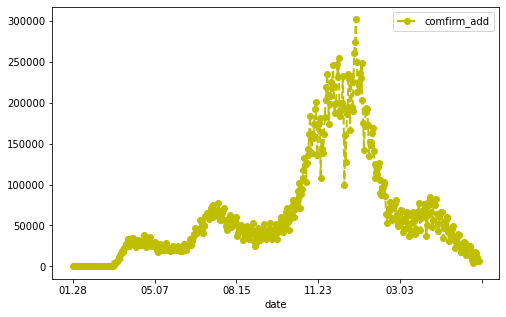

In [40]:
#新增病例折线图
usa_addconf=pd.DataFrame(columns=['日期','新增病例'])
usa_addconf=usa_table[['日期','新增病例']]
usa_addconf.columns=['date','comfirm_add']
usa_addconf.set_index('date',inplace=True)
usa_addconf.plot(style='yo--', figsize=(8,5))

<AxesSubplot:xlabel='date'>

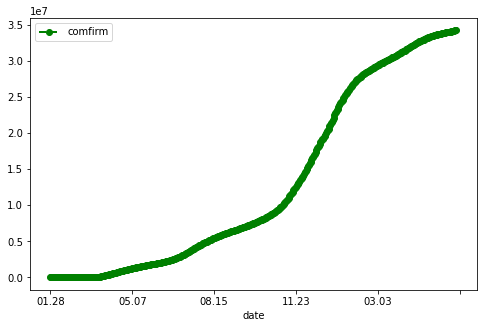

In [36]:
#确诊人数折线图
usa_conf=pd.DataFrame(columns=['日期','确诊人数'])
usa_conf=usa_table[['日期','确诊人数']]
usa_conf.columns=['date','comfirm']
usa_conf.set_index('date',inplace=True)
usa_conf.plot(style='go--', figsize=(8,5))

<AxesSubplot:xlabel='date'>

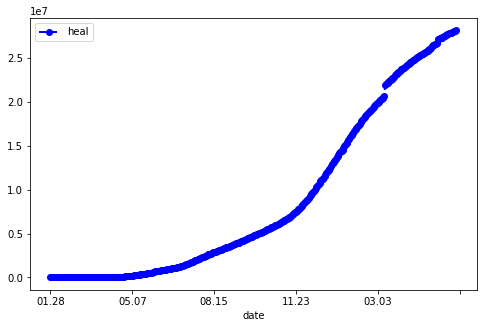

In [35]:
#治愈人数折线图
usa_heal=pd.DataFrame(columns=['日期','治愈人数'])
usa_heal=usa_table[['日期','治愈人数']]
usa_heal.columns=['date','heal']
usa_heal.set_index('date',inplace=True)
usa_heal.plot(style='bo--', figsize=(8,5))

<AxesSubplot:xlabel='date'>

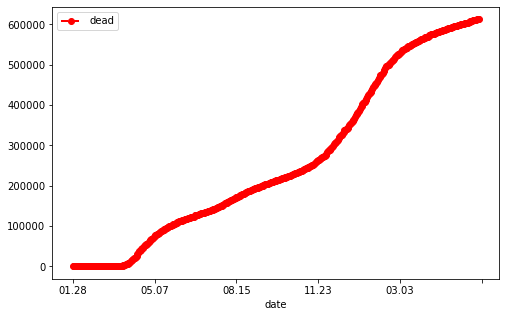

In [65]:
#死亡人数折线图
usa_dead=pd.DataFrame(columns=['日期','死亡人数'])
usa_dead=usa_table[['日期','死亡人数']]
usa_dead.columns=['date','dead']
usa_dead.set_index('date',inplace=True)
usa_dead.plot(style='ro--', figsize=(8,5))

In [12]:
#各国数据
fc = pd.read_csv('foreign_countries.csv',names=['国家'])
fc = fc.values
flatten=[]
for i in fc:
    flatten.append(i[0])
    count=count+1


SyntaxError: invalid syntax (<ipython-input-12-5bbe54ad02a8>, line 5)

In [67]:
country_tb=[]
for i in range(0,175):
    url='https://api.inews.qq.com/newsqa/v1/automation/foreign/daily/list?country=%s'%fc[i][0]
    response = requests.get(url, timeout=20)
    data = response.json()['data']
    data=pd.DataFrame(data)
    country_tb.append(data)
country_tb[0]

,y,date,confirm_add,confirm,heal,dead
0,2020,03.02,1,1,0,0
1,2020,03.03,0,1,0,0
2,2020,03.04,0,1,0,0
3,2020,03.05,0,1,0,0
4,2020,03.06,0,1,0,0
...,...,...,...,...,...,...
458,2021,06.03,15,13744,13507,127
459,2021,06.04,14,13758,13527,127
460,2021,06.05,0,13758,13527,127
461,2021,06.06,0,13758,13527,127
